#### USECASE - 2
#### Explore the data (alldata.csv) and help the organisation understand about the data science job market in US.

#### Task : 1
#### Perform an Exploratory Data Analysis and come-up with the maximum insights you can get through the data.



#### PS : SUBMIT THE TASKS FOR BOTH THE USE-CASES IN SEPARATE JUPYTER NOTEBOOKS - PDF Preferred(Each for one use-case). YOU MUST BE IN POSITION TO EXPLAIN THE WHYs & HOWs IN DETAILS OF YOUR SUBMISSIONS.


In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS # for wordclouds
import re

In [273]:
%cd C:\Users\nsidd\OneDrive\Desktop\ai_ml-tasks

C:\Users\nsidd\OneDrive\Desktop\ai_ml-tasks


In [274]:
data = pd.read_csv("alldata.csv")

In [275]:
df = data.copy()

In [276]:
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [277]:
df.isnull().sum()

position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

In [278]:
df = df.dropna()

In [279]:
df.isnull().sum()

position       0
company        0
description    0
reviews        0
location       0
dtype: int64

In [280]:
# We have 1682 missing values in entire dataset of which reviews has highest missing values.

In [281]:
df.shape

(5326, 5)

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5326 entries, 3 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     5326 non-null   object 
 1   company      5326 non-null   object 
 2   description  5326 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     5326 non-null   object 
dtypes: float64(1), object(4)
memory usage: 249.7+ KB


#### EDA on Position and Location

In [283]:
df['position'].nunique() #No. of positions in Dataset include 4221

4221

In [284]:
pos = df['position'].value_counts()

In [285]:
pos

Data Scientist                                                                          204
Senior Data Scientist                                                                    53
Research Analyst                                                                         44
Data Engineer                                                                            39
Machine Learning Engineer                                                                26
                                                                                       ... 
Data Manager, Viral Hepatitis, Bureau of Communicable Diseases                            1
RN FLOW /OPERATIONS MANAGER / 40 HOUR / DAY SHIFT - BWH - PRIMARY CARE - MAIN CAMPUS      1
Sr Research Coordinator                                                                   1
Statistical Programmer Analyst                                                            1
Senior Manager, Data Analytics                                                  

#### Data Scientist Position tops the list with 257 Vacant Roles

In [286]:
top = list(pos.index)[:10]
top

['Data Scientist',
 'Senior Data Scientist',
 'Research Analyst',
 'Data Engineer',
 'Machine Learning Engineer',
 'Sr. Data Scientist',
 'Principal Data Scientist',
 'Quantitative Analyst',
 'Research Scientist',
 'Lead Data Scientist']

#### These are top 10 positions which has high demand and Vacancy in US Market

In [287]:
locat= df['location'].value_counts()
locat = list(locat.index)[:10]
locat

['Seattle, WA',
 'Cambridge, MA',
 'New York, NY',
 'Boston, MA',
 'San Francisco, CA',
 'San Diego, CA',
 'Chicago, IL',
 'Boulder, CO',
 'Sunnyvale, CA',
 'Washington, DC']

In [288]:
df['location'].nunique()

328

#### Cities with Most Vacancy of Jobs

<AxesSubplot:>

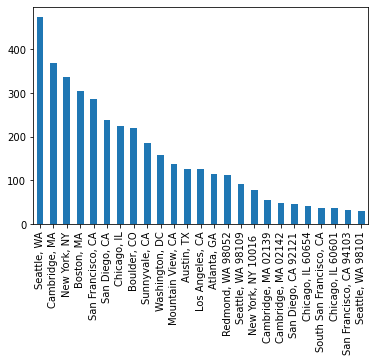

In [289]:
df['location'].value_counts().head(25).plot.bar()

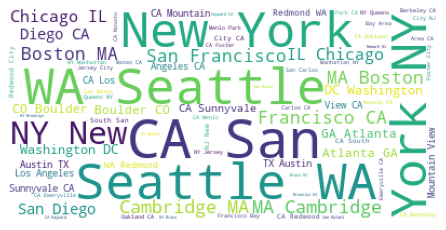

In [290]:
positions_text = " ".join(df['location'].dropna().to_list())
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white").generate(positions_text)
  
# plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [291]:
df['location'].value_counts()

Seattle, WA             474
Cambridge, MA           368
New York, NY            338
Boston, MA              305
San Francisco, CA       287
                       ... 
Chicago, IL 60602         1
New York, NY 10007        1
Orangeburg, NY 10962      1
Burlingame, CA            1
Washington, DC 20002      1
Name: location, Length: 328, dtype: int64

#### a. Seattle tops the list with 474 vacant positions followed by Cambridge, New York and rest. 
#### b. Also, Amazon Headquarters is Seattle (Washington) so something to correlate. One among the FAANG
#### c. Only Seattle has above 400 job roles rest under 400 
#### d. There are 328 unique Locations present in dataset
#### e. Bar Plot and Word Cloud displaying Locations

#### Most Wanted Position in US Market

<AxesSubplot:>

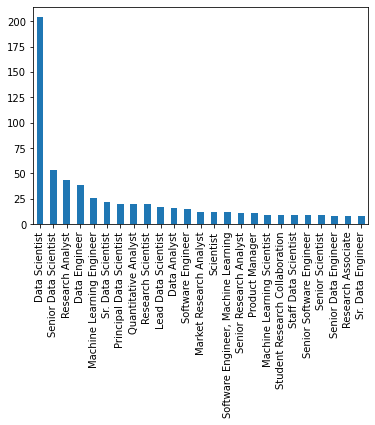

In [292]:
df['position'].value_counts().head(25).plot.bar()

#### 1. The Data is Right Skewed and we can see Data Scientist Position has highest vacancy in US Job Market
#### 2. Also, There are few other DS positions like Senior DS, Lead DS, Sr. DS, Staff DS, etc
#### 3. In top 5, we can Research Analyst, Data Engineer, ML Engineer jobs which also have high demand in future

In [293]:
# Word Cloud

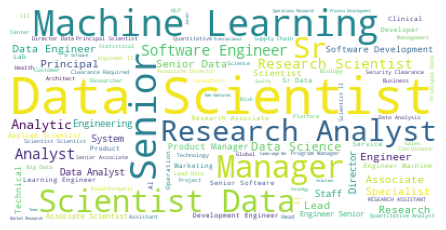

In [294]:
positions_text = " ".join(df['position'].dropna().to_list())
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(positions_text)
  
# plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### a. Word Cloud gives a graphical display of words which occur frequently
#### b. More Bold and Large a word, Higher the Frequency
#### c. As I Mentioned earlier, Data Scientist role has many job positions so appeared most frequently
#### d. Followed by Research Analyst,ML Enginner, Data Engineer, Software Engineer, Scientist, Data Science, etc

#### EDA on Company

In [295]:
df.head()

,position,company,description,reviews,location
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,385.0,"Atlanta, GA 30318"
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\nBachelor’s degree\n5-7 years o...,385.0,"Atlanta, GA 30318"
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,899.0,"Atlanta, GA"


In [296]:
df['company'].value_counts().head(10)

Amazon.com                                357
Ball Aerospace                            187
Microsoft                                 137
Google                                    134
NYU Langone Health                         76
Fred Hutchinson Cancer Research Center     70
KPMG                                       66
Facebook                                   49
Broad Institute                            49
Walmart eCommerce                          45
Name: company, dtype: int64

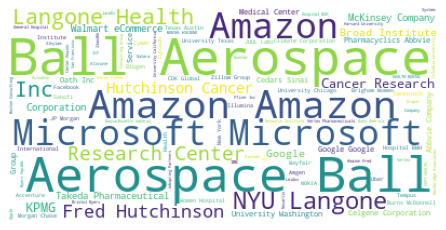

In [297]:
positions_text = " ".join(df['company'].dropna().to_list())
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(positions_text)
  
# plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<AxesSubplot:>

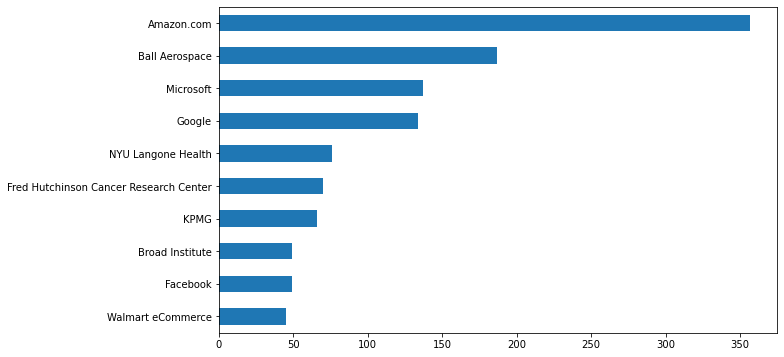

In [298]:
df['company'].value_counts().head(10).sort_values().plot.barh(figsize = (10,6))

#### 1. Amazon has the Highest vacancy of Jobs in USA with 357
#### 2. Followed by Ball Aerospace, Microsoft, Google, etc
#### 3. Word Cloud & Bar Plot displaying the companies

In [299]:
df.head()

,position,company,description,reviews,location
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,385.0,"Atlanta, GA 30318"
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\nBachelor’s degree\n5-7 years o...,385.0,"Atlanta, GA 30318"
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,899.0,"Atlanta, GA"


In [300]:
# Separating City and State
new = df["location"].str.split(", ", n = 1, expand = True) 
df["city"] = new[0]
df["state"] = new[1]

# Removing Zip code
state = df["state"].str.split(" ", n = 1, expand = True) 
df["state"] = state[0]


In [301]:
df.head()

,position,company,description,reviews,location,city,state
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303",Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",Atlanta,GA
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,385.0,"Atlanta, GA 30318",Atlanta,GA
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\nBachelor’s degree\n5-7 years o...,385.0,"Atlanta, GA 30318",Atlanta,GA
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,899.0,"Atlanta, GA",Atlanta,GA


<AxesSubplot:xlabel='state', ylabel='count'>

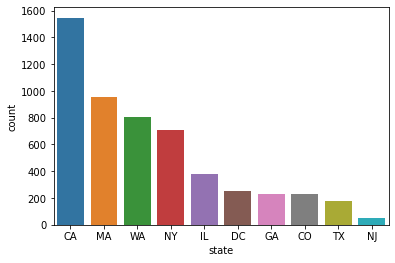

In [302]:
sns.countplot(x = "state", order = df['state'].value_counts().index,data = df)

In [303]:
df['state'].value_counts()

CA    1547
MA     955
WA     804
NY     707
IL     381
DC     249
GA     227
CO     227
TX     176
NJ      53
Name: state, dtype: int64

#### From above countplot, we can say that state CA has highest job positions with 1547

In [306]:
df.groupby(['state'])['city'].value_counts()

state  city         
CA     San Francisco    389
       San Diego        323
       Sunnyvale        210
       Mountain View    189
       Los Angeles      168
                       ... 
TX     Austin           171
       Round Rock         4
       Cedar Park         1
WA     Seattle          661
       Redmond          143
Name: city, Length: 83, dtype: int64

<AxesSubplot:ylabel='state,city'>

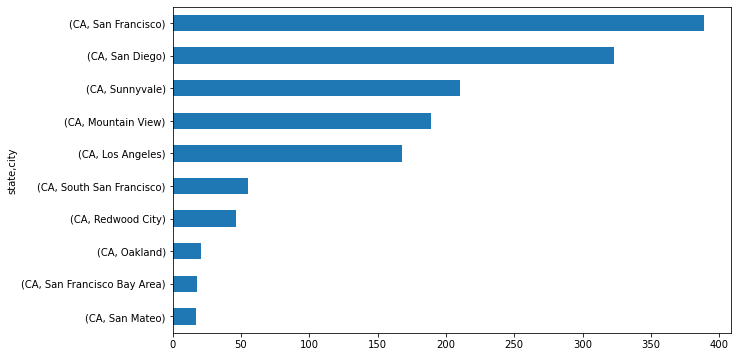

In [305]:
df.groupby(['state'])['city'].value_counts().head(10).sort_values().plot.barh(figsize = (10,6))

#### Though Seattle City (WA State) has Highest Number of Vacancy/ Positions (661) among all other cities but California State has highest positions with 1547 positions across other cities.

In [307]:
df.head()

,position,company,description,reviews,location,city,state
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303",Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",Atlanta,GA
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,385.0,"Atlanta, GA 30318",Atlanta,GA
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\nBachelor’s degree\n5-7 years o...,385.0,"Atlanta, GA 30318",Atlanta,GA
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,899.0,"Atlanta, GA",Atlanta,GA


In [308]:
most_reviews = df.groupby(['company'])['reviews'].sum()

In [309]:
most_reviews = most_reviews.reset_index(name = 'reviews')

In [310]:
most_reviews = most_reviews.sort_values(['reviews'], ascending = False)

In [343]:
most_reviews.head()

,company,reviews
77,Amazon.com,9246299.0
1238,Walmart,740478.0
749,Microsoft,632613.0
633,JP Morgan Chase,548616.0
1132,The Home Depot,465284.0


#### As a no brainer, Amazon has highest company reviews among all other companies tells how giant organization it is.

#### Number of Roles w.r.t City

In [313]:
role_city = df.groupby(['location', 'company'])[['position']].count()
role_city=role_city.reset_index()
role_city.head()

,location,company,position
0,"Alameda, CA",Abbott Laboratories,1
1,"Alameda, CA",Google,1
2,"Alameda, CA 94501",Heliotrope Technologies,1
3,"Atlanta, GA",AMERICAN CANCER SOCIETY,2
4,"Atlanta, GA",Accenture,2


In [337]:
role_city = role_city.sort_values(['position'], ascending=False).head(10)
role_city.head(10)

,location,company,position
1474,"Seattle, WA",Amazon.com,232
331,"Boulder, CO",Ball Aerospace,187
1129,"Redmond, WA 98052",Microsoft,110
1023,"New York, NY 10016",NYU Langone Health,72
1567,"Seattle, WA 98109",Fred Hutchinson Cancer Research Center,70
750,"Mountain View, CA",Google,62
365,"Cambridge, MA",Amazon.com,50
374,"Cambridge, MA",Broad Institute,49
1624,"Sunnyvale, CA",Walmart eCommerce,43
1536,"Seattle, WA",University of Washington,39


#### Clearly, Amazon has highest vacancies of 232 followed by Ball Aerospace. 

In [344]:
df.head()

,position,company,description,reviews,location,city,state
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303",Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",Atlanta,GA
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,385.0,"Atlanta, GA 30318",Atlanta,GA
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\nBachelor’s degree\n5-7 years o...,385.0,"Atlanta, GA 30318",Atlanta,GA
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,899.0,"Atlanta, GA",Atlanta,GA


In [355]:
data1= df.copy()

In [356]:
data1.head()

,position,company,description,reviews,location,city,state
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303",Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",Atlanta,GA
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,385.0,"Atlanta, GA 30318",Atlanta,GA
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\nBachelor’s degree\n5-7 years o...,385.0,"Atlanta, GA 30318",Atlanta,GA
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,899.0,"Atlanta, GA",Atlanta,GA


In [358]:
select_data_us = data1[["position","description"]]

In [359]:
select_data_us.head()

,position,description
3,Data Analyst,DEPARTMENT: Program OperationsPOSITION LOCATIO...
4,Assistant Professor -TT - Signal Processing & ...,DESCRIPTION\nThe Emory University Department o...
5,Manager of Data Engineering,Qualifications\nBachelor’s degree in Computer ...
6,"Product Specialist - Periscope, New Ventures",Qualifications\nBachelor’s degree\n5-7 years o...
7,"Junior to Mid-level Engineer, Geologist or Env...",Overview / Responsibilities\nWood Environment ...


In [365]:
select_data_us = select_data_us.applymap(str)

In [384]:
#### Replacing words like apply, apply now, Job Description with empty spaces which isn't necessary for analysis

In [366]:
select_data_us["description"] = select_data_us["description"].replace(to_replace='Apply', value="",regex=True)
select_data_us["description"] = select_data_us["description"].replace(to_replace='apply', value="",regex=True)
select_data_us["description"] = select_data_us["description"].replace(to_replace='now', value="",regex=True)
select_data_us["description"] = select_data_us["description"].replace(to_replace='apply now', value="",regex=True)
select_data_us["description"] = select_data_us["description"].replace(to_replace='Apply Now', value="",regex=True)
select_data_us["description"] = select_data_us["description"].replace(to_replace='Job Description', value="",regex=True)
select_data_us["description"] = select_data_us["description"].replace(to_replace='job description', value="",regex=True)
select_data_us["description"] = select_data_us["description"].replace(to_replace='changes everything', value="",regex=True)
select_data_us["description"] = select_data_us["description"].replace(to_replace='everything', value="",regex=True)
select_data_us["description"] = select_data_us["description"].replace(to_replace='data scientist', value="Data Scientist",regex=True)

In [367]:
#View the resulting concatenated dataframe
select_data_us.head()

,position,description
3,Data Analyst,DEPARTMENT: Program OperationsPOSITION LOCATIO...
4,Assistant Professor -TT - Signal Processing & ...,DESCRIPTION\nThe Emory University Department o...
5,Manager of Data Engineering,Qualifications\nBachelor’s degree in Computer ...
6,"Product Specialist - Periscope, New Ventures",Qualifications\nBachelor’s degree\n5-7 years o...
7,"Junior to Mid-level Engineer, Geologist or Env...",Overview / Responsibilities\nWood Environment ...


In [368]:
select_data_us.shape

(5326, 2)

In [370]:
# Filtering Data Analyst Role
DataScientist = select_data_us[select_data_us['position'].str.contains("Data Scientist")]
DataScientist.head()

,position,description
9,Senior Associate - Cognitive Data Scientist Na...,Kn for being a great place to work and build a...
12,"Senior Associate, Data Scientist",Innovate. Collaborate. Shine. Lighthouse — KPM...
15,Data Scientist,Cotiviti is looking for an industry leading Da...
22,Data Scientist,Join a growing Data Science and Advanced Analy...
24,"Data Scientist, Keying & Linking",Job Number: 16614\nPosition Title:\nExternal D...


In [380]:
# N Grams for Data Scientist Job Role

In [372]:
#ngram function
def ngram_extractor(text, n_gram):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Function to generate a dataframe with n_gram and top max_row frequencies
def generate_ngrams(df, n_gram, max_row):
    temp_dict = defaultdict(int)
    for question in df:
        for word in ngram_extractor(question, n_gram):
            temp_dict[word] += 1
    temp_df = pd.DataFrame(sorted(temp_dict.items(), key=lambda x: x[1])[::-1]).head(max_row)
    temp_df.columns = ["word", "wordcount"]
    return temp_df

#Function to construct side by side comparison plots
def comparison_plot(df_1,df_2,col_1,col_2, space):
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    
    sns.barplot(x=col_2, y=col_1, data=df_1, ax=ax[0], color="royalblue")
    sns.barplot(x=col_2, y=col_1, data=df_2, ax=ax[1], color="royalblue")

    ax[0].set_xlabel('Word count', size=14)
    ax[0].set_ylabel('Words', size=14)
    ax[0].set_title('Top 20 Bi-grams in Descriptions', size=18)

    ax[1].set_xlabel('Word count', size=14)
    ax[1].set_ylabel('Words', size=14)
    ax[1].set_title('Top 20 Tri-grams in Descriptions', size=18)

    fig.subplots_adjust(wspace=space)
    
    plt.show()

In [374]:
#Select descriptions from Scientist
Scientist_desc = DataScientist["description"]
Scientist_desc.replace('--', np.nan, inplace=True) 
Scientist_desc_na = Scientist_desc.dropna()
#convert list elements to lower case
Scientist_desc_na_cleaned = [item.lower() for item in Scientist_desc_na]
#remove html links from list 
Scientist_desc_na_cleaned =  [re.sub(r"http\S+", "", item) for item in Scientist_desc_na_cleaned]
#remove special characters left
Scientist_desc_na_cleaned = [re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", item) for item in Scientist_desc_na_cleaned]
#convert to dataframe
Scientist_desc_na_cleaned = pd.DataFrame(np.array(Scientist_desc_na_cleaned).reshape(-1))
#Squeeze dataframe to obtain series
Scientist_cleaned = Scientist_desc_na_cleaned.squeeze()

C:\Users\nsidd\Anaconda3\lib\site-packages\pandas\core\series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [376]:
from collections import defaultdict

#### Unigrams

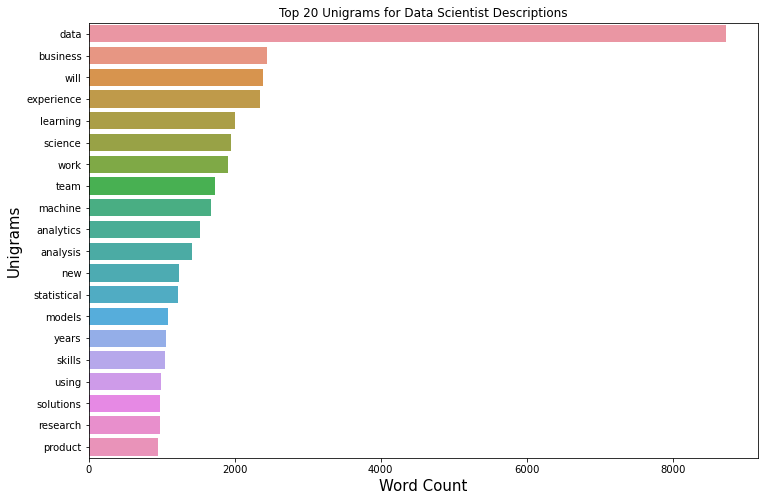

In [379]:
#Generate unigram for data analyst
Scientist_1gram = generate_ngrams(Scientist_cleaned, 1, 20)
#generate barplot for unigram
plt.figure(figsize=(12,8))
sns.barplot(Scientist_1gram["wordcount"],Scientist_1gram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Unigrams", fontsize=15)
plt.title("Top 20 Unigrams for Data Scientist Descriptions")
plt.show()

#### From above plot, we can say that working with Data is key for Data Scientists. Bringing Value out of Data should be must.
#### lets try bigrams, trigrams

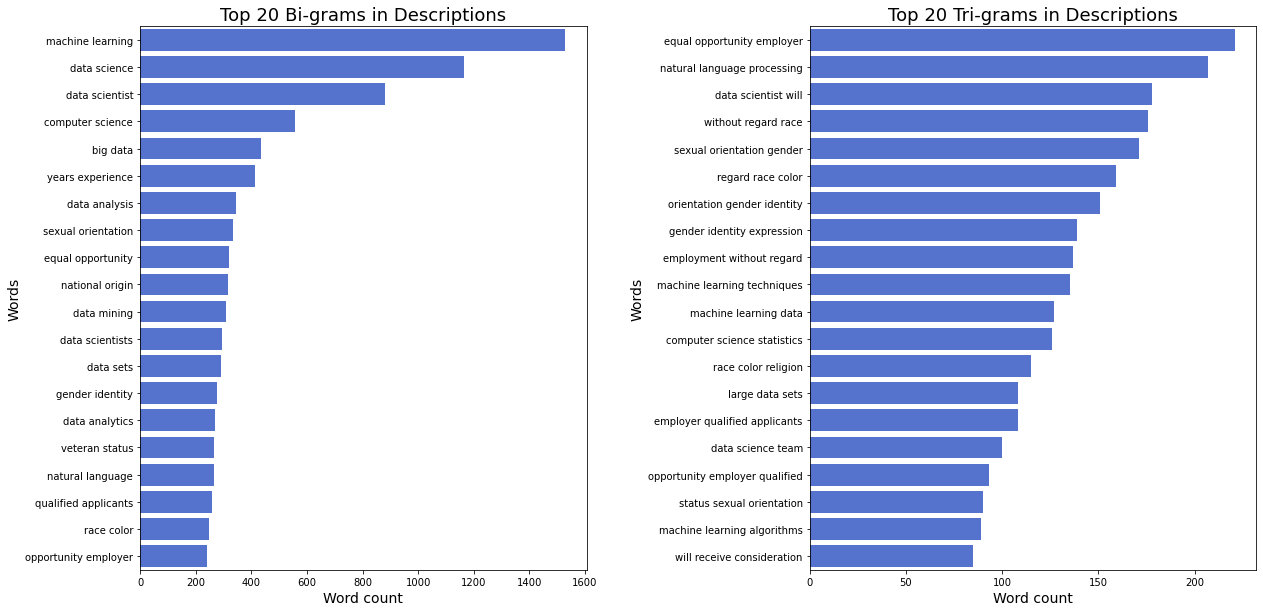

In [382]:
#Obtain bi-grams and tri-grams (top 20)
Scientist_2gram = generate_ngrams(Scientist_cleaned, 2, 20)
Scientist_3gram = generate_ngrams(Scientist_cleaned, 3, 20)
#compare the bar plots
comparison_plot(Scientist_2gram,Scientist_3gram,'word','wordcount', 0.5)

#### Takeaways:- 
#### 1. Bigrams
####  a. We can say that word, Machine Learning has highest freq meaning they should be perfect in Machine Learning Concepts, Data Science, Data Scientist etc.
####  b. Also, description says they are preferring Computer Science background candidates but that's not a limitation. 
####  c. Years of Experience is also a factor considered more in description.
####  d. Few other words include Datasets, Data Analytics, data mining etc related to Technical skills and concepts.
####  e. Some irrelevant words like opportunity employer, race color, veteran status, equal opportunity is most visible words in Descriptions.

#### 2. Trigrams
####  a. Equal opportunity employer has highest frequency which is again common in JD. As discussed earlier some common words appeared most freq here also.
####  b. In Trigrams, words like NLP has high demand of skills in JD, followed by data scientist
####  c. Some skills like Machine Learning data, Statistics, Large Data Sets, refers to some qualifications the candidate should have for Data Scientist role

#### To Conclude, Data Scientist should have knowledge on Machine Learning Techniques, Business Knowledge, Working on large datasets, Statistical Techniques, Data Mining, Data Analytics skills to be Successful Data Scientist 

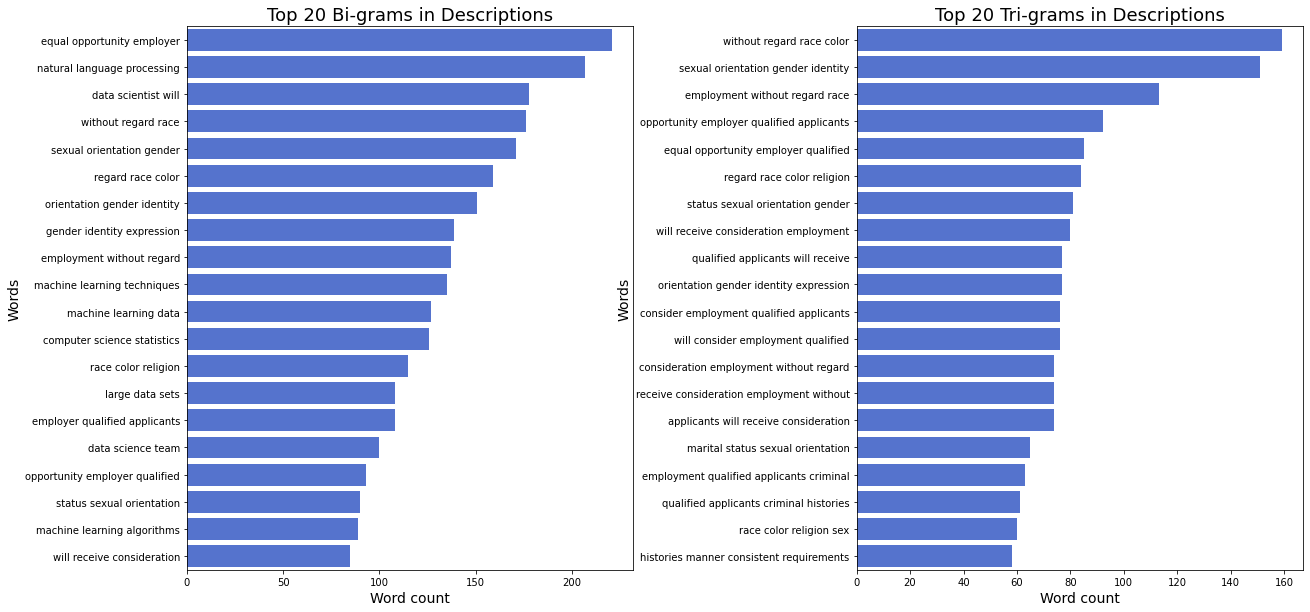

In [385]:
#Obtain bi-grams and tri-grams (top 20)
Scientist_3gram = generate_ngrams(Scientist_cleaned, 3, 20)
Scientist_4gram = generate_ngrams(Scientist_cleaned, 4, 20)
#compare the bar plots
comparison_plot(Scientist_3gram,Scientist_4gram,'word','wordcount', 0.5)